In [2]:
import sys
import os
import glob
sys.path.append("../")
from yoloneatviz import HolovizNapari
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot  as plt
from natsort import natsorted
import numpy as np

Movie: DIAP_mov5Division

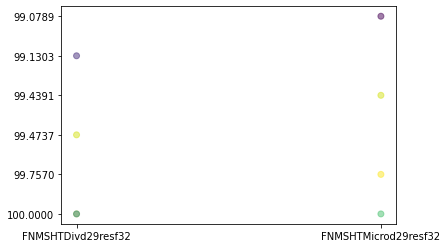

,MovieName,NetworkName,CellType,Accuracy
0,DivisionLocationDIAP_mov5,FNMSHTDivd29resf32,Division,100.0000
1,DivisionLocationDIAP_mov5,FNMSHTMicrod29resf32,Division,99.4391
2,DivisionLocationFlo_pupe1_s1_s2_s3_s4_mov,FNMSHTDivd29resf32,Division,99.0789
3,DivisionLocationFlo_pupe1_s1_s2_s3_s4_mov,FNMSHTMicrod29resf32,Division,99.4737
4,DivisionLocationFlo_pupe2_mutant_s5_s6_s7_s8_mov,FNMSHTDivd29resf32,Division,100.0000
5,DivisionLocationFlo_pupe2_mutant_s5_s6_s7_s8_mov,FNMSHTMicrod29resf32,Division,100.0000
6,DivisionLocationEventMovie,FNMSHTDivd29resf32,Division,99.7570
7,DivisionLocationEventMovie,FNMSHTMicrod29resf32,Division,99.1303


In [4]:
threshold = 20
MovieName = []
NetworkName = []
CellName = []
Accuracy = []
resultsdir = '/Users/aimachine/oneat_analysis/Penultimate/Results/'
Path(resultsdir).mkdir(exist_ok=True)

csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/ONEATDIAP_mov5Division.csv'

csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTDivd29resf32/DivisionLocationDIAP_mov5.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTDivd29resf32')
CellName.append('Division')
Accuracy.append(str('%.4f'%tp))


csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTMicrod29resf32/DivisionLocationDIAP_mov5.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTMicrod29resf32')
CellName.append('Division')
Accuracy.append(str('%.4f'%tp))


csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/ONEATFlo_pupe1_s1_s2_s3_s4_movDivision.csv'

csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTDivd29resf32/DivisionLocationFlo_pupe1_s1_s2_s3_s4_mov.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTDivd29resf32')
CellName.append('Division')
Accuracy.append(str('%.4f'%tp))


csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTMicrod29resf32/DivisionLocationFlo_pupe1_s1_s2_s3_s4_mov.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTMicrod29resf32')
CellName.append('Division')
Accuracy.append(str('%.4f'%tp))


csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/ONEATFlo_pupe2_mutant_s5_s6_s7_s8_movDivision.csv'

csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTDivd29resf32/DivisionLocationFlo_pupe2_mutant_s5_s6_s7_s8_mov.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTDivd29resf32')
CellName.append('Division')
Accuracy.append(str('%.4f'%tp))


csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTMicrod29resf32/DivisionLocationFlo_pupe2_mutant_s5_s6_s7_s8_mov.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTMicrod29resf32')
CellName.append('Division')
Accuracy.append(str('%.4f'%tp))

csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/ONEATEventMovieDivision.csv'

csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTDivd29resf32/DivisionLocationEventMovie.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTDivd29resf32')
CellName.append('Division')
Accuracy.append(str('%.4f'%tp))


csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTMicrod29resf32/DivisionLocationEventMovie.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTMicrod29resf32')
CellName.append('Division')
Accuracy.append(str('%.4f'%tp))




df = pd.DataFrame(list(zip(MovieName,NetworkName,CellName,Accuracy)), index = None, 
                                                                      columns =['MovieName', 'NetworkName', 'CellType',  'Accuracy'])
                        
df.to_csv(resultsdir + '/' + 'DivisionDynamicAccuracy' +  '.csv')  
df

Accuracy = natsorted(Accuracy, reverse = True)

colors = np.random.rand(len(Accuracy))
plt.scatter(NetworkName, Accuracy,  alpha=0.5, c = colors)


plt.savefig(resultsdir + '/' + 'FullDynamicaccuracy' + '.png', dpi = 300)
plt.show()
df

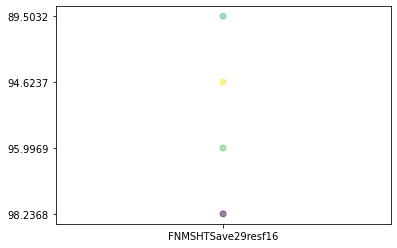

                       MovieName         NetworkName  CellType Accuracy
0      DivisionLocationDIAP_mov5  FNMSHTSave29resf16  Division  89.5032
1  DivisionLocationTimeLapseBIG1  FNMSHTSave29resf16  Division  94.6237
2  DivisionLocationTimeLapseBIG5  FNMSHTSave29resf16  Division  98.2368
3     DivisionLocationEventMovie  FNMSHTSave29resf16  Division  95.9969


In [19]:
threshold = 10
MovieName = []
NetworkName = []
CellName = []
Accuracy = []
csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/ONEATDIAP_mov5Division.csv'
csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTSave29resf16/DivisionLocationDIAP_mov5.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTSave29resf16')
CellName.append('Division')
Accuracy.append(str('%.4f'%tp))





csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/ONEATTimeLapseBIG1Division.csv'

csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTSave29resf16/DivisionLocationTimeLapseBIG1.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTSave29resf16')
CellName.append('Division')
Accuracy.append(str('%.4f'%tp))



csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/ONEATTimeLapseBIG5Division.csv'
csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTSave29resf16/DivisionLocationTimeLapseBIG5.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTSave29resf16')
CellName.append('Division')
Accuracy.append(str('%.4f'%tp))



csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/ONEATEventMovieDivision.csv'
csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTSave29resf16/DivisionLocationEventMovie.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTSave29resf16')
CellName.append('Division')
Accuracy.append(str('%.4f'%tp))




df = pd.DataFrame(list(zip(MovieName,NetworkName,CellName,Accuracy)), index = None, 
                                                                      columns =['MovieName', 'NetworkName', 'CellType',  'Accuracy'])
                        
df.to_csv(resultsdir + '/' + 'DivisionStaticAccuracy' +  '.csv')  
df
Accuracy = natsorted(Accuracy, reverse = True)

colors = np.random.rand(len(Accuracy))
plt.scatter(NetworkName, Accuracy, alpha=0.5, c = colors)


plt.savefig(resultsdir + '/' + 'DivisionStaticaccuracy' + '.png', dpi = 300)
plt.show()
print(df)

Next

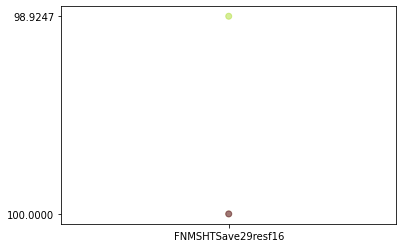

,MovieName,NetworkName,CellType,Accuracy
0,NonMatureP1LocationFlo_pupe2_mutant_s5_s6_s7_s...,FNMSHTSave29resf16,NonMature,100.0000
1,NonMatureP1LocationEventMovie,FNMSHTSave29resf16,NonMature,100.0000
2,NonMatureP1LocationTimeLapseBIG1,FNMSHTSave29resf16,NonMature,98.9247


In [22]:
threshold = 20
MovieName = []
NetworkName = []
CellName = []
Accuracy = []




csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/cellnetbin2/ONEATFlo_pupe2_mutant_s5_s6_s7_s8_movNonMatureP1.csv'

csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTSave29resf16/NonMatureP1LocationFlo_pupe2_mutant_s5_s6_s7_s8_mov.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTSave29resf16')
CellName.append('NonMature')
Accuracy.append(str('%.4f'%tp))


csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/cellnetbin2/ONEATEventMovieNonMatureP1.csv'

csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTSave29resf16/NonMatureP1LocationEventMovie.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTSave29resf16')
CellName.append('NonMature')
Accuracy.append(str('%.4f'%tp))

csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/cellnetbin2/ONEATTimeLapseBIG1NonMatureP1.csv'

csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTSave29resf16/NonMatureP1LocationTimeLapseBIG1.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTSave29resf16')
CellName.append('NonMature')
Accuracy.append(str('%.4f'%tp))





df = pd.DataFrame(list(zip(MovieName,NetworkName,CellName,Accuracy)), index = None, 
                                                                      columns =['MovieName', 'NetworkName', 'CellType',  'Accuracy'])
                        
df.to_csv(resultsdir + '/' + 'NonMatureP1cellsAccuracy' +  '.csv')  
df
Accuracy = natsorted(Accuracy, reverse = True)

colors = np.random.rand(len(Accuracy))
plt.scatter(NetworkName, Accuracy,alpha=0.5, c = colors)



plt.savefig(resultsdir + '/' + 'NonMatureP1Accuracy' + '.png', dpi = 300)

plt.show()
df

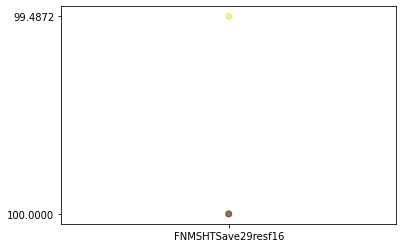

In [25]:


threshold = 20
MovieName = []
NetworkName = []
CellName = []
Accuracy = []


csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/cellnetbin2/ONEATFlo_pupe2_mutant_s5_s6_s7_s8_movMatureP1.csv'



csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTSave29resf16/MatureP1LocationFlo_pupe2_mutant_s5_s6_s7_s8_mov.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTSave29resf16')
CellName.append('Mature')
Accuracy.append(str('%.4f'%tp))



csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/cellnetbin2/ONEATEventMovieMatureP1.csv'



csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTSave29resf16/MatureP1LocationEventMovie.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTSave29resf16')
CellName.append('Mature')
Accuracy.append(str('%.4f'%tp))



csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/cellnetbin2/ONEATTimeLapseBIG1MatureP1.csv'



csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTSave29resf16/MatureP1LocationTimeLapseBIG1.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTSave29resf16')
CellName.append('Mature')
Accuracy.append(str('%.4f'%tp))



csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/cellnetbin2/ONEATTimeLapseBIG5MatureP1.csv'



csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTSave29resf16/MatureP1LocationTimeLapseBIG5.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTSave29resf16')
CellName.append('Mature')
Accuracy.append(str('%.4f'%tp))





df = pd.DataFrame(list(zip(MovieName,NetworkName,CellName,Accuracy)), index = None, 
                                                                      columns =['MovieName', 'NetworkName', 'CellType',  'Accuracy'])
                        
df.to_csv(resultsdir + '/' + 'MatureP1cellsAccuracy' +  '.csv')  
df
Accuracy = natsorted(Accuracy, reverse = True)

colors = np.random.rand(len(Accuracy))
plt.scatter(NetworkName, Accuracy,alpha=0.5, c = colors)


plt.savefig(resultsdir + '/' + 'MatureP1Accuracy' + '.png', dpi = 300)
df

plt.show()

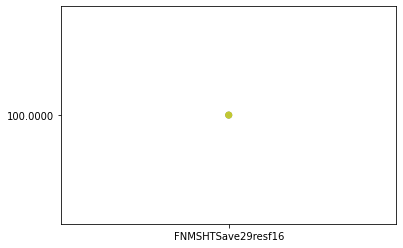

In [5]:
threshold = 20
MovieName = []
NetworkName = []
CellName = []
Accuracy = []

csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/cellnetbin2/ONEATFlo_pupe2_mutant_s5_s6_s7_s8_movMacroCheate.csv'

csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTSave29resf16/MacroCheateLocationFlo_pupe2_mutant_s5_s6_s7_s8_mov.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTSave29resf16')
CellName.append('MacroCheate')
Accuracy.append(str('%.4f'%tp))




csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/cellnetbin2/ONEATEventMovieMacroCheate.csv'

csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTSave29resf16/MacroCheateLocationEventMovie.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTSave29resf16')
CellName.append('MacroCheate')
Accuracy.append(str('%.4f'%tp))



csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/cellnetbin2/ONEATTimeLapseBIG1MacroCheate.csv'

csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTSave29resf16/MacroCheateLocationTimeLapseBIG1.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTSave29resf16')
CellName.append('MacroCheate')
Accuracy.append(str('%.4f'%tp))



csv_gt = '/Users/aimachine/oneat_analysis/Penultimate/GT/divisionbin2V1/cellnetbin2/ONEATTimeLapseBIG5MacroCheate.csv'

csv_pred = '/Users/aimachine/oneat_analysis/Penultimate/FNMSHTSave29resf16/MacroCheateLocationTimeLapseBIG5.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp = HolovizNapari.TruePositives(csv_gt, csv_pred, threshold = threshold)
MovieName.append(Name)
NetworkName.append('FNMSHTSave29resf16')
CellName.append('MacroCheate')
Accuracy.append(str('%.4f'%tp))




df = pd.DataFrame(list(zip(MovieName,NetworkName,CellName,Accuracy)), index = None, 
                                                                      columns =['MovieName', 'NetworkName', 'CellType',  'Accuracy'])
                        
df.to_csv(resultsdir + '/' + 'MacroCheateAccuracy' +  '.csv')  
df

Accuracy = natsorted(Accuracy, reverse = True)

colors = np.random.rand(len(Accuracy))
plt.scatter(NetworkName, Accuracy, alpha=0.5, c = colors)


plt.savefig(resultsdir + '/' + 'MacroCheateAccuracy' + '.png', dpi = 300)
plt.show()